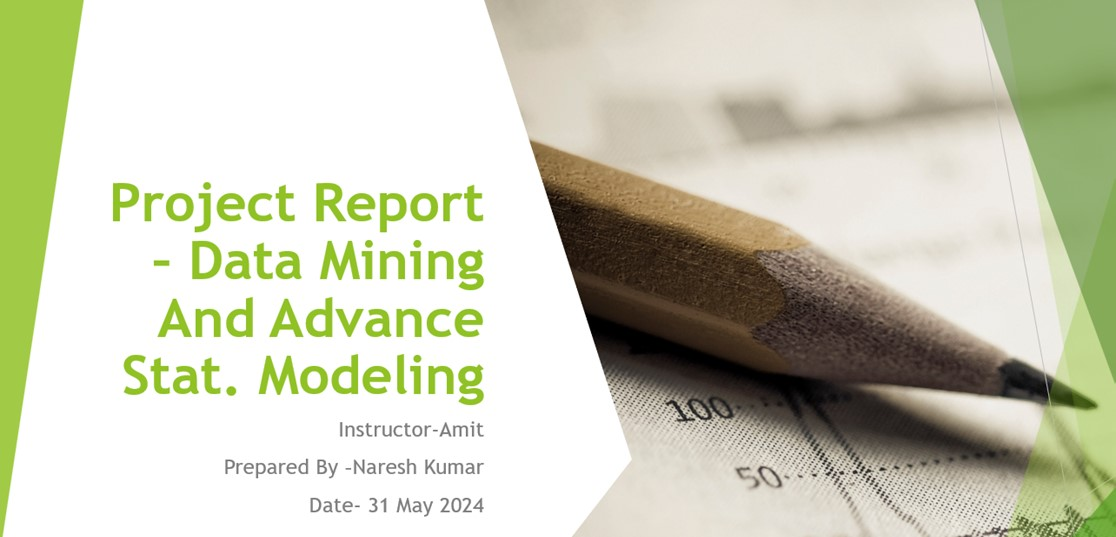

•	Introduction to Washington House Prices Analysis Welcome to our Report on Washington house prices. We have a dataset with 4,600 entries and 18 features

•	This rich dataset will help us understand the factors that influence house prices in Washington. First, we will explore the dataset to see patterns and trends. We will look at how prices vary in different areas and what features affect the prices the most. This will give us a clear picture of the housing market in Washington

•	Next, we will use machine learning to predict house prices. By building and testing different models, we can make accurate predictions about future prices. Our goal is to provide useful insights for home buyers, sellers, and policymakers to make informed decisions.

•	Report Overview - The first step is to understand the data and the overarching business context

•	Data Acquisition - For this project, the data is stored in a CSV file and must be imported into Jupyter

•	Data Preparation - Preparing the data includes addressing missing values, correcting errors, and organizing the data into appropriate formats.

•	Data Analysis - Exploratory data analysis and machine learning modeling.
•	Key Findings & Insights - Finally, we consolidate our results and provide recommendations for future considerations


Our data analysis will use an excel file called Washington price data set. The original file's columns are shown in the image. Below in the picture we can see the libraries that we have used and we can also see the data frame information. Data has  4600 entries and 18 columns


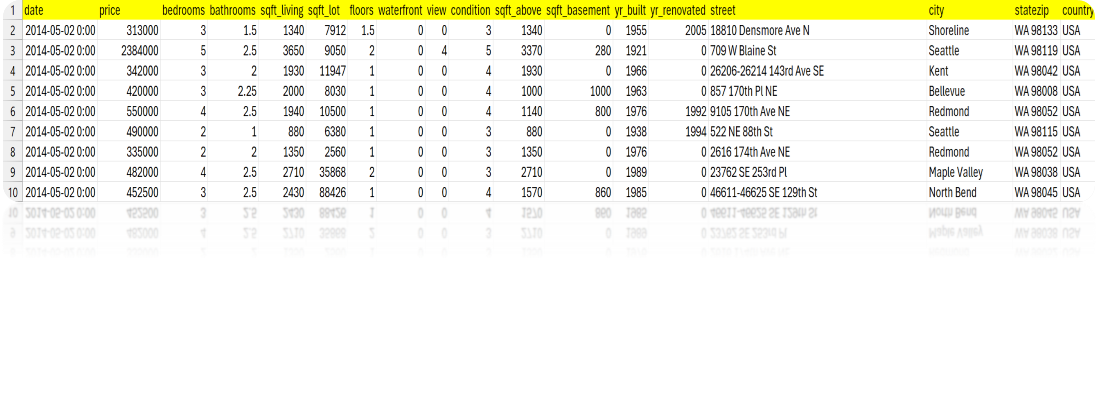

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [43]:
file_path = 'Washington_price_dataset.csv'
df = pd.read_csv(file_path)

# Identifying the Datatypes

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [3]:
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
df.tail(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 0:00,308166.6667,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 0:00,534333.3333,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 0:00,416904.1667,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 0:00,203400.0000,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 0:00,220600.0000,3,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [7]:
# Print the initial shape of the dataset
print(f"Initial shape of the dataset: {df.shape}")

Initial shape of the dataset: (4600, 18)


In [8]:
#3. Identify data types for each variable
data_types = df.dtypes
print(data_types)

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


#3-date: object – This column likely contains dates, which are currently stored as strings. It would be useful to convert these to a datetime format for better analysis.
price: float64 – This column contains the prices of the properties, stored as floating-point numbers.
bedrooms: int64 – This column contains the number of bedrooms in each property, stored as integers.
bathrooms: float64 – This column contains the number of bathrooms in each property, stored as floating-point numbers (possibly to account for half bathrooms).
sqft_living: int64 – This column contains the square footage of the living area, stored as integers.
sqft_lot: int64 – This column contains the square footage of the lot, stored as integers.
floors: float64 – This column contains the number of floors in each property, stored as floating-point numbers.
waterfront: int64 – This column indicates whether the property is on the waterfront (binary indicator), stored as integers.
view: int64 – This column contains a rating of the view from the property, stored as integers.
condition: int64 – This column contains a rating of the condition of the property, stored as integers.
sqft_above: int64 – This column contains the square footage of the living area above ground, stored as integers.
sqft_basement: int64 – This column contains the square footage of the basement, stored as integers.
yr_built: int64 – This column contains the year the property was built, stored as integers.
yr_renovated: int64 – This column contains the year the property was renovated, stored as integers.
street: object – This column contains the street address, stored as strings.
city: object – This column contains the city, stored as strings.
statezip: object – This column contains the state and ZIP code, stored as strings.
country: object – This column contains the country, stored as strings.

# Missing Values

In [55]:
# 4.	Missing entries: Determine the number of missing entries per variable
missing_entries = df.isnull().sum()
print(missing_entries)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


# Checking Duplicate Values

In [56]:
#5 Identify and count duplicate records
duplicate_records = df.duplicated()
duplicate_count = duplicate_records.sum()
print(f"Number of duplicate records: {duplicate_count}")

Number of duplicate records: 0


# 6. Univariate Analysis 

 Conduct this analysis on all variables, creating appropriate visualizations.

#Univariate Analysis for Numerical Variables


In [46]:
#6 Dataset Descriptive Statistics
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.103478,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.159990,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Key Insights
Price:

The average property price is approximately $551,963, with a standard deviation of $563,834.
The prices range from $0 to $26,590,000, indicating a wide variety of property values.
Bedrooms and Bathrooms:

The typical property has about 3-4 bedrooms and 2 bathrooms.
The maximum number of bedrooms in the dataset is 9, and the maximum number of bathrooms is 8.
Size Attributes:

The average living area is around 2139 square feet, with a lot size averaging 14,852 square feet.
Properties can be as small as 370 square feet and as large as 13,540 square feet in living area.
Floors:

Most properties have between 1 and 2 floors, with the average number of floors being 1.51.
Special Features:

Only a small fraction (0.7%) of properties are waterfront.
View ratings and condition ratings indicate that many properties may have average views and conditions.
Construction:

The average year built is 1970, suggesting that many properties are relatively old.
Renovation is less common, with the majority of properties not having undergone significant renovations (indicated by a median of 0 for the year renovated).

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


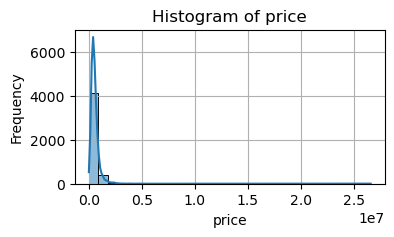

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


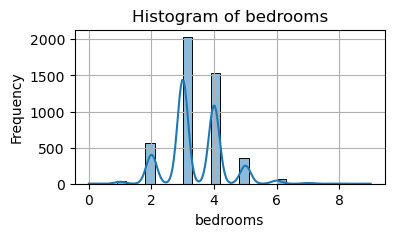

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


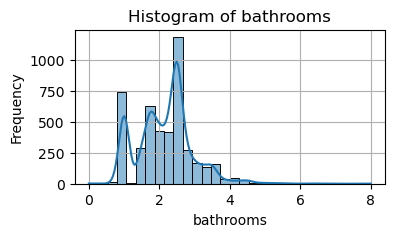

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


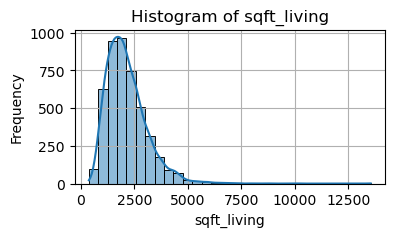

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


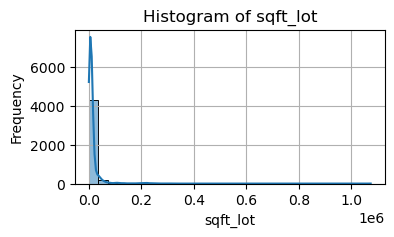

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


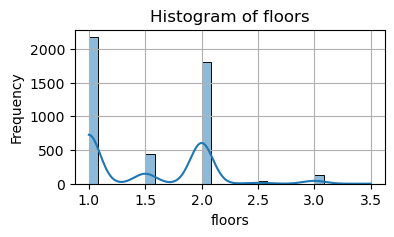

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


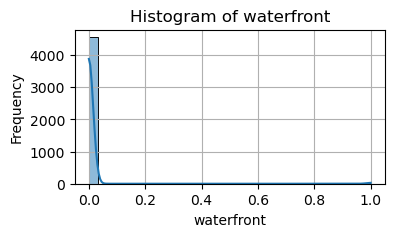

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


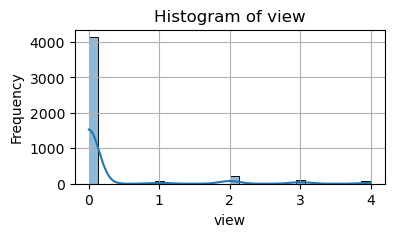

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


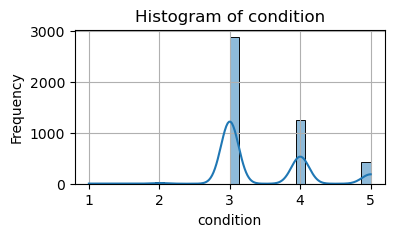

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


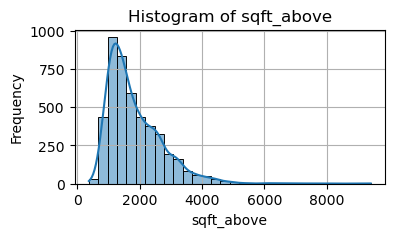

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


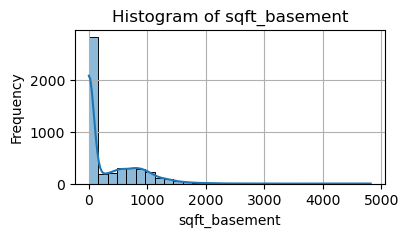

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


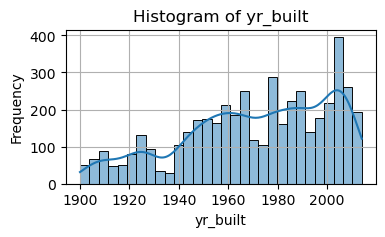

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


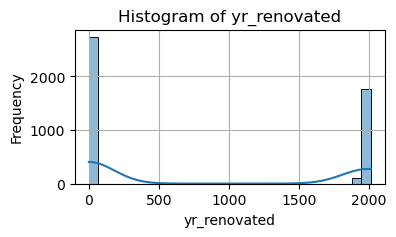

In [47]:
# Convert infinite values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# List of numerical variables
numerical_variables = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 
                       'yr_built', 'yr_renovated']

# Create histograms for each numerical variable
for variable in numerical_variables:
    plt.figure(figsize=(4, 2))
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


# Outlier detection by tukey method

In [48]:
import numpy as np  

df1 = df.copy() 

# Convert infinite values to NaN
df1.replace([np.inf, -np.inf], np.nan, inplace=True)

# List of numerical variables
numerical_variables = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
                       'yr_built', 'yr_renovated']

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detect and print outliers for each numerical variable
for variable in numerical_variables:
    outliers = detect_outliers_iqr(df1[variable])
    print(f"Outliers in {variable} (IQR method):\n", outliers, "\n")


Outliers in price (IQR method):
 1       2.384000e+06
11      1.400000e+06
14      1.200000e+06
99      1.395000e+06
122     2.280000e+06
            ...     
4348    2.199900e+06
4350    2.659000e+07
4465    2.560498e+06
4467    1.337044e+06
4572    1.288333e+06
Name: price, Length: 240, dtype: float64 

Outliers in bedrooms (IQR method):
 92      6
122     7
170     6
241     9
252     7
       ..
4357    6
4442    1
4509    6
4556    1
4572    6
Name: bedrooms, Length: 118, dtype: int64 

Outliers in bathrooms (IQR method):
 122     8.00
143     4.25
217     4.00
223     3.75
227     5.00
        ... 
4523    4.50
4528    5.00
4558    4.25
4572    4.50
4575    6.25
Name: bathrooms, Length: 141, dtype: float64 

Outliers in sqft_living (IQR method):
 122     13540
143      4420
148      4490
217      4510
227      4490
        ...  
4400     5010
4432     5960
4523     5230
4528     4550
4575     8020
Name: sqft_living, Length: 129, dtype: int64 

Outliers in sqft_lot (IQR method):
 

In [49]:
# Detect outliers and remove them from the DataFrame
for variable in numerical_variables:
    outliers = detect_outliers_iqr(df1[variable])
    df1.drop(outliers.index, inplace=True)

# Print cleaned numerical variables
for variable in numerical_variables:
    print(f"filtered {variable}:\n", df1[variable], "\n")


filtered price:
 0       313000.0000
2       342000.0000
3       420000.0000
4       550000.0000
5       490000.0000
           ...     
4595    308166.6667
4596    534333.3333
4597    416904.1667
4598    203400.0000
4599    220600.0000
Name: price, Length: 3316, dtype: float64 

filtered bedrooms:
 0       3
2       3
3       3
4       4
5       2
       ..
4595    3
4596    3
4597    3
4598    4
4599    3
Name: bedrooms, Length: 3316, dtype: int64 

filtered bathrooms:
 0       1.50
2       2.00
3       2.25
4       2.50
5       1.00
        ... 
4595    1.75
4596    2.50
4597    2.50
4598    2.00
4599    2.50
Name: bathrooms, Length: 3316, dtype: float64 

filtered sqft_living:
 0       1340
2       1930
3       2000
4       1940
5        880
        ... 
4595    1510
4596    1460
4597    3010
4598    2090
4599    1490
Name: sqft_living, Length: 3316, dtype: int64 

filtered sqft_lot:
 0        7912
2       11947
3        8030
4       10500
5        6380
        ...  
4595     6360


In [12]:
# Print the initial shape of the dataset
print(f"Initial shape of the dataset: {df.shape}")
# Print the initial shape of the dataset
print(f"Shape after removal of outliers: {df1.shape}")

Initial shape of the dataset: (4600, 18)
Shape after removal of outliers: (3316, 18)


C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


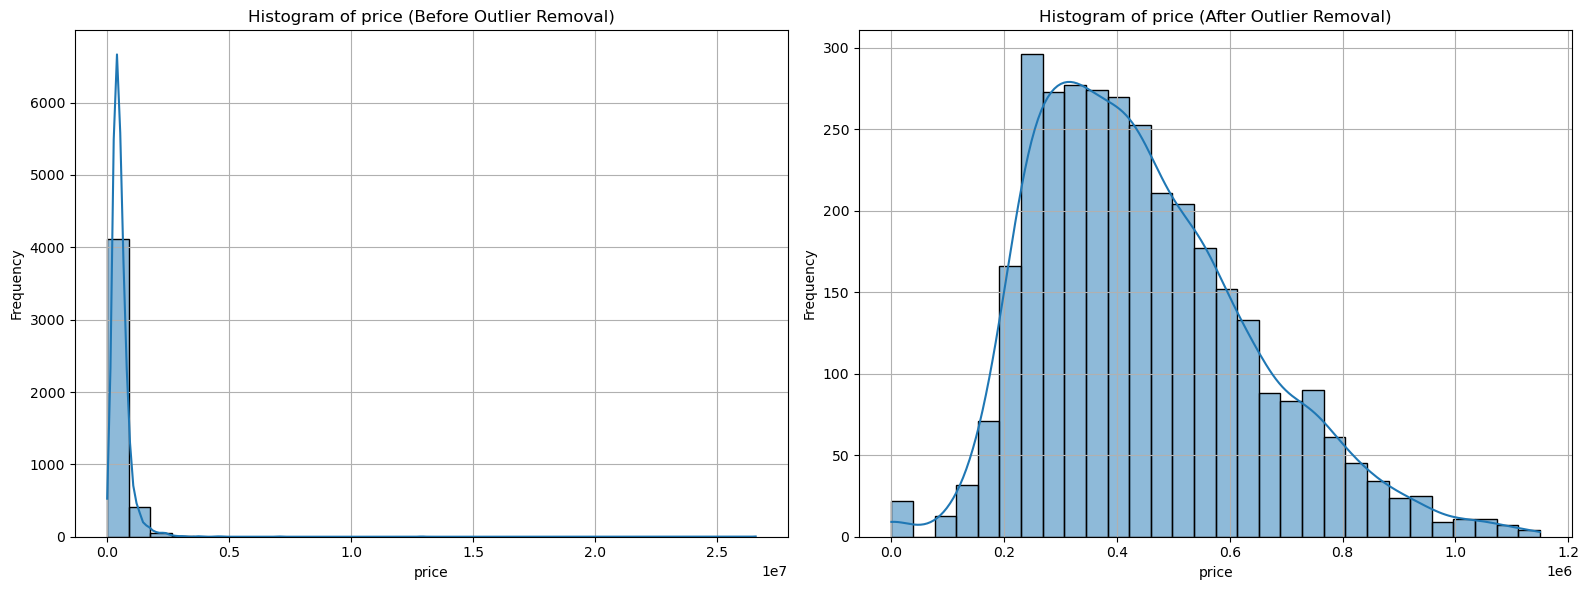

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


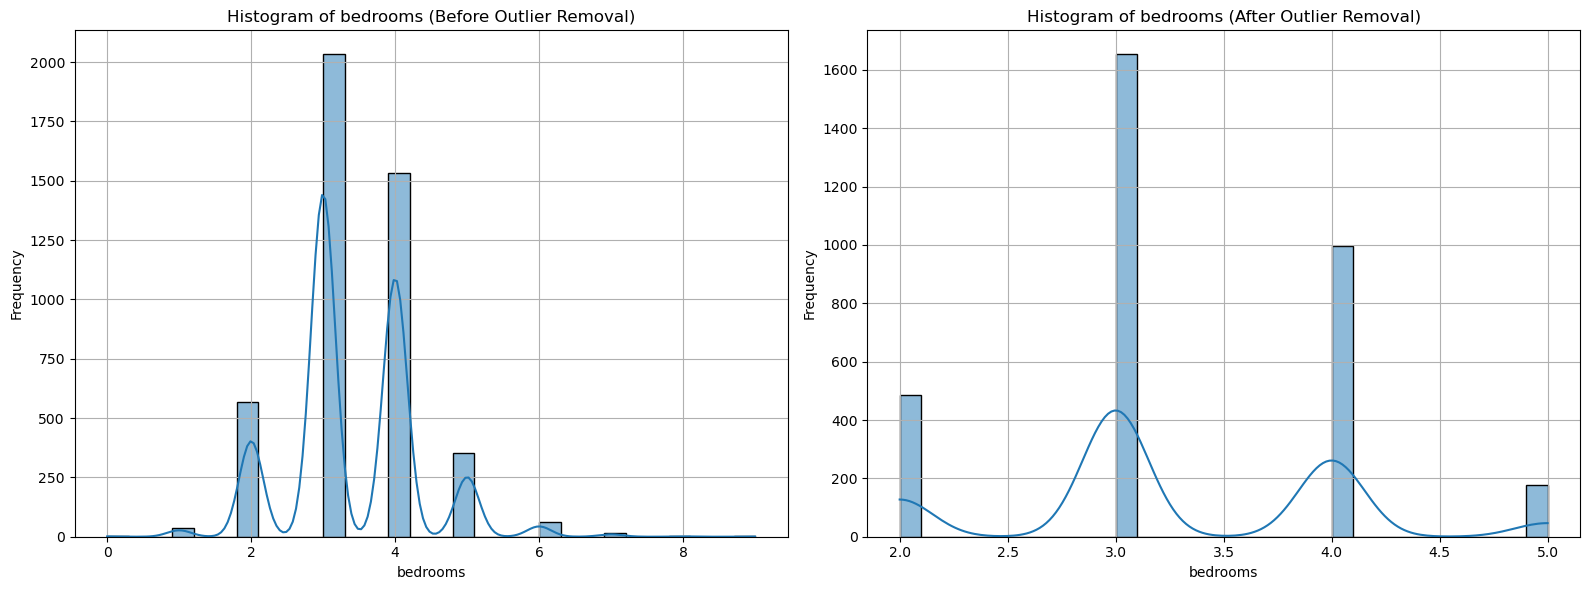

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


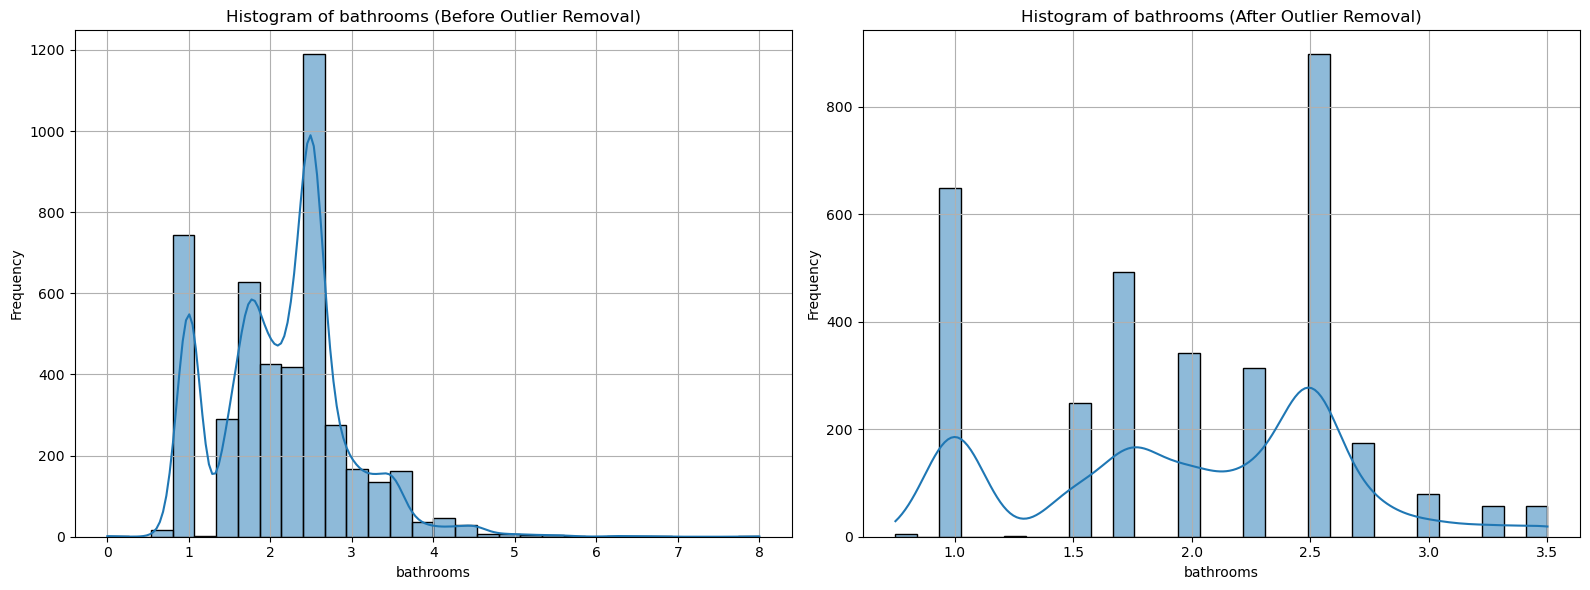

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


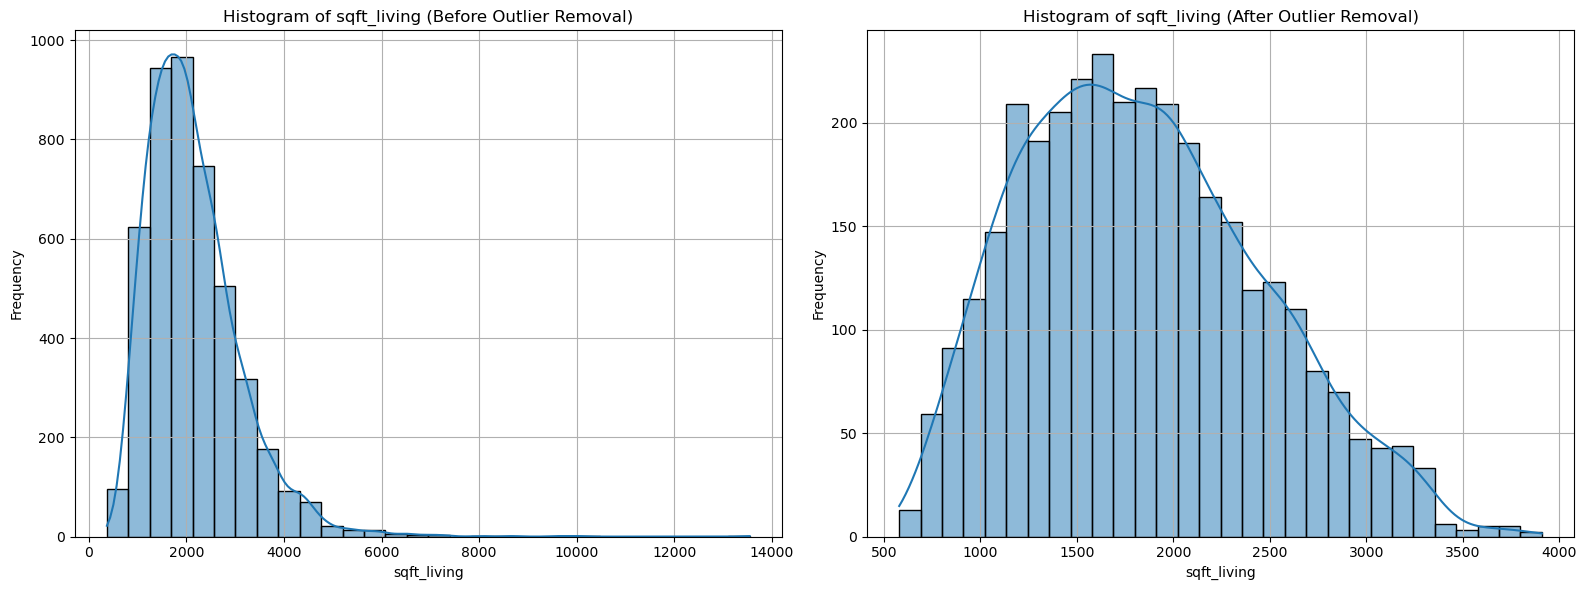

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


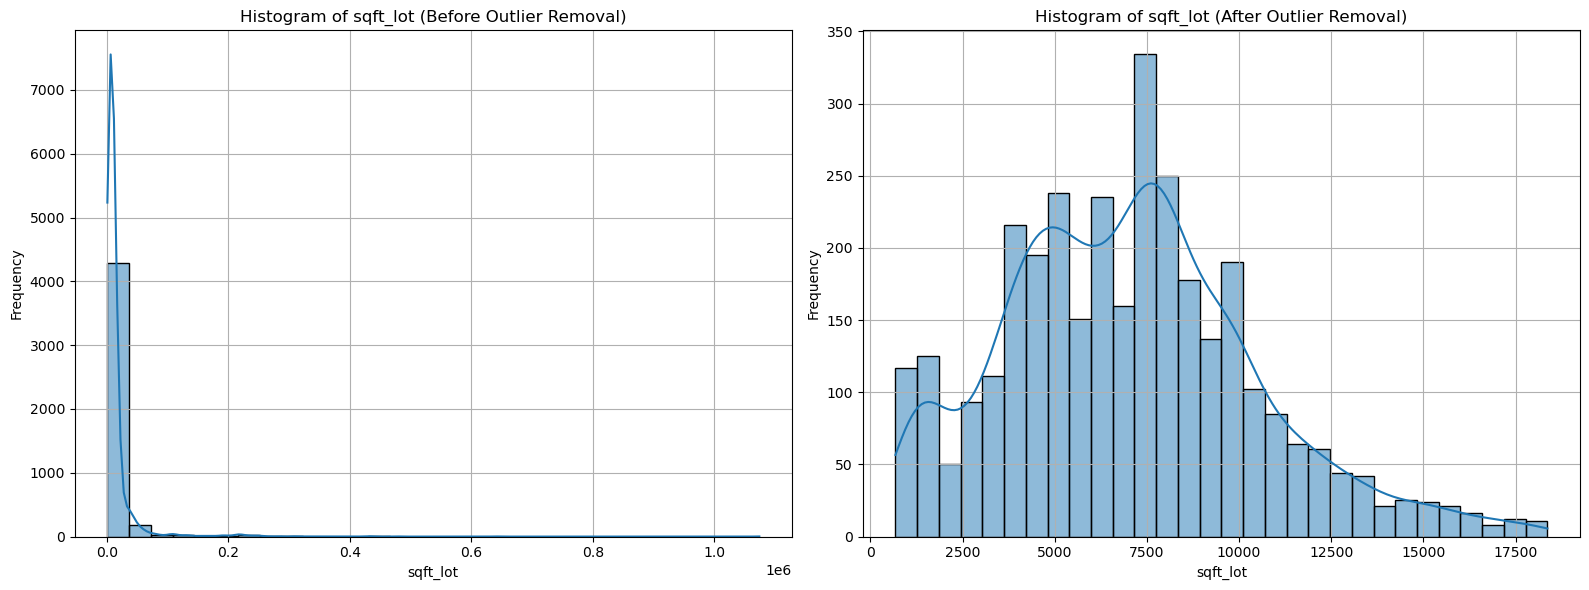

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


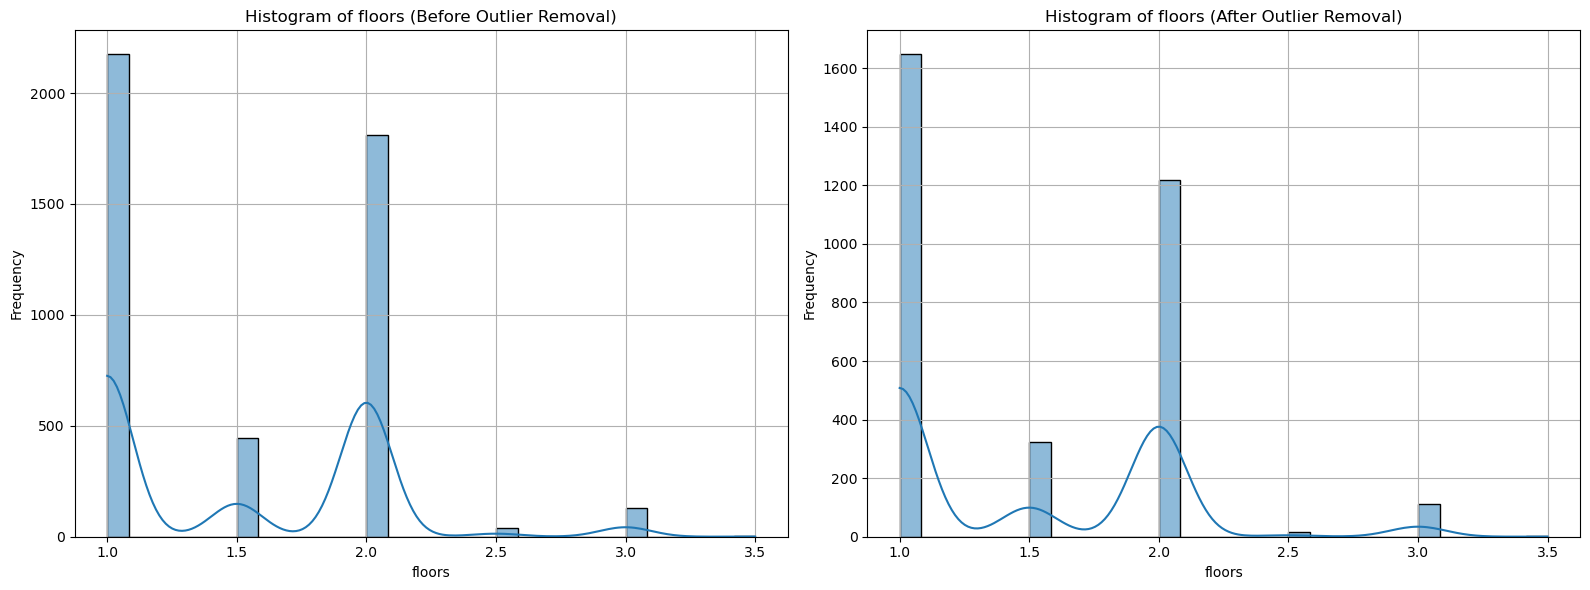

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


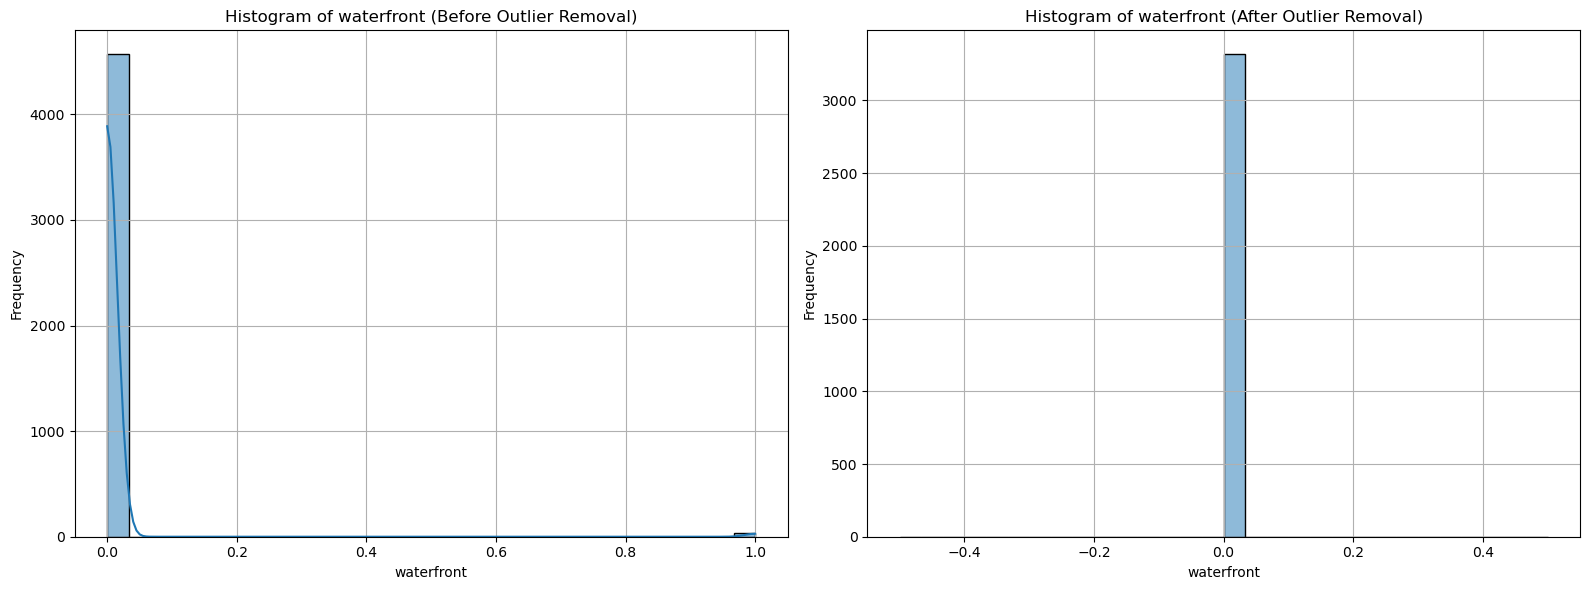

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


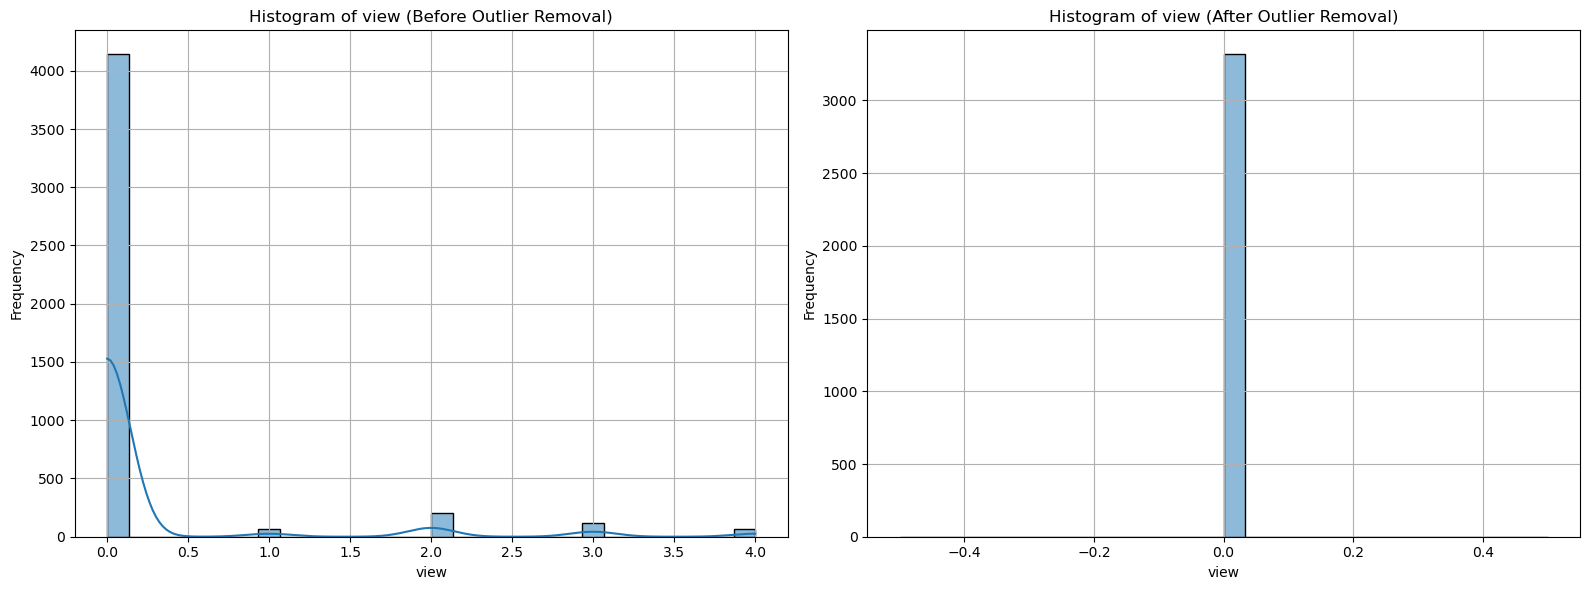

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


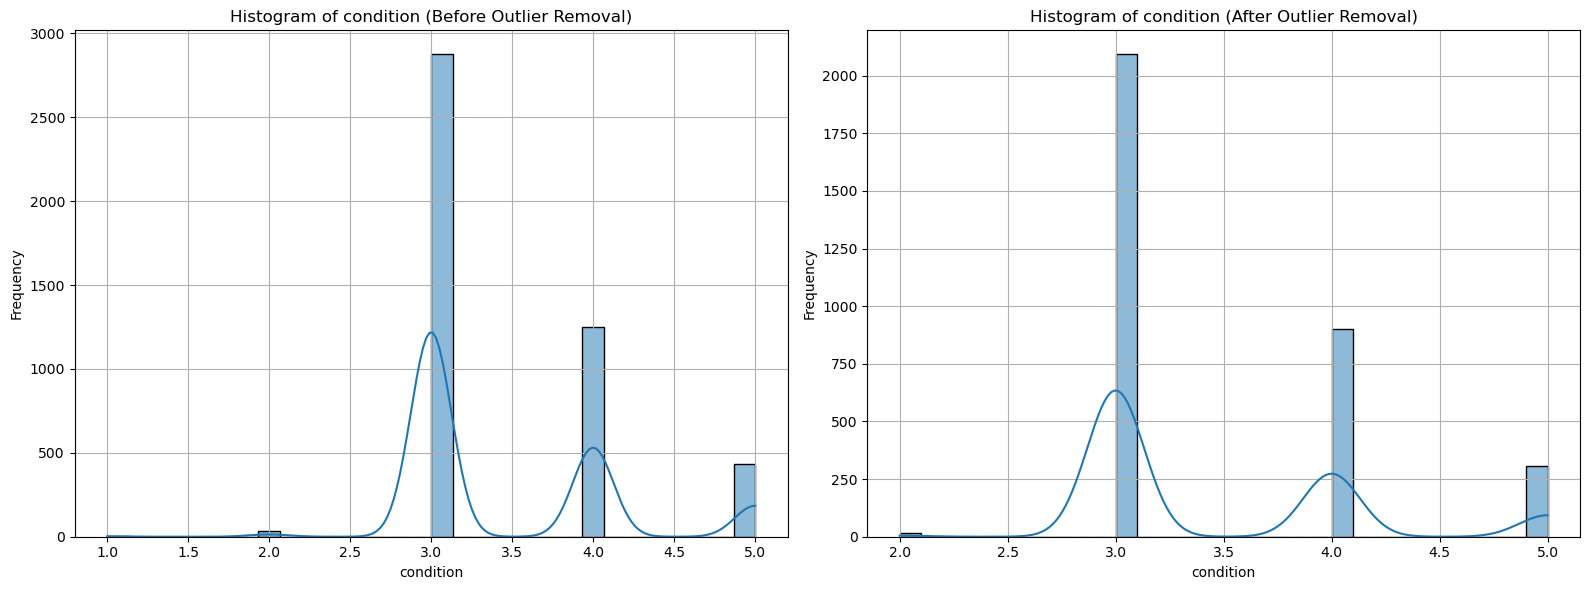

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


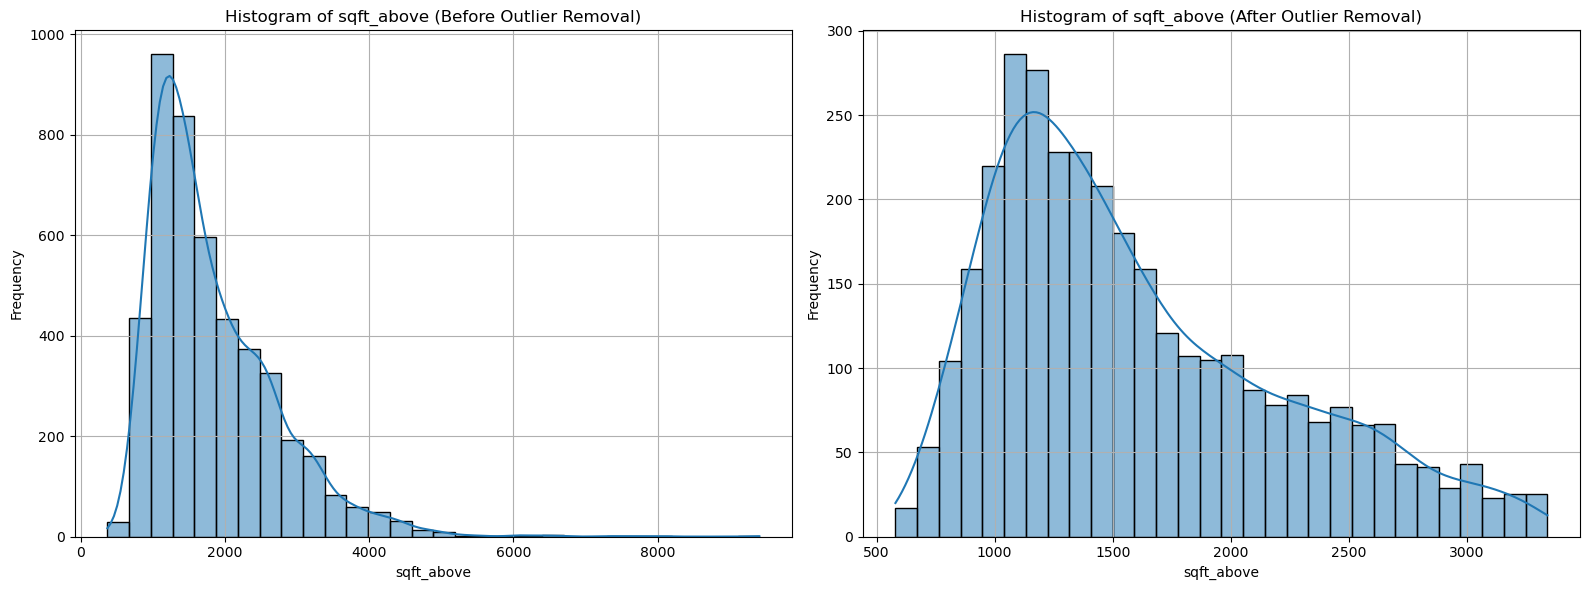

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


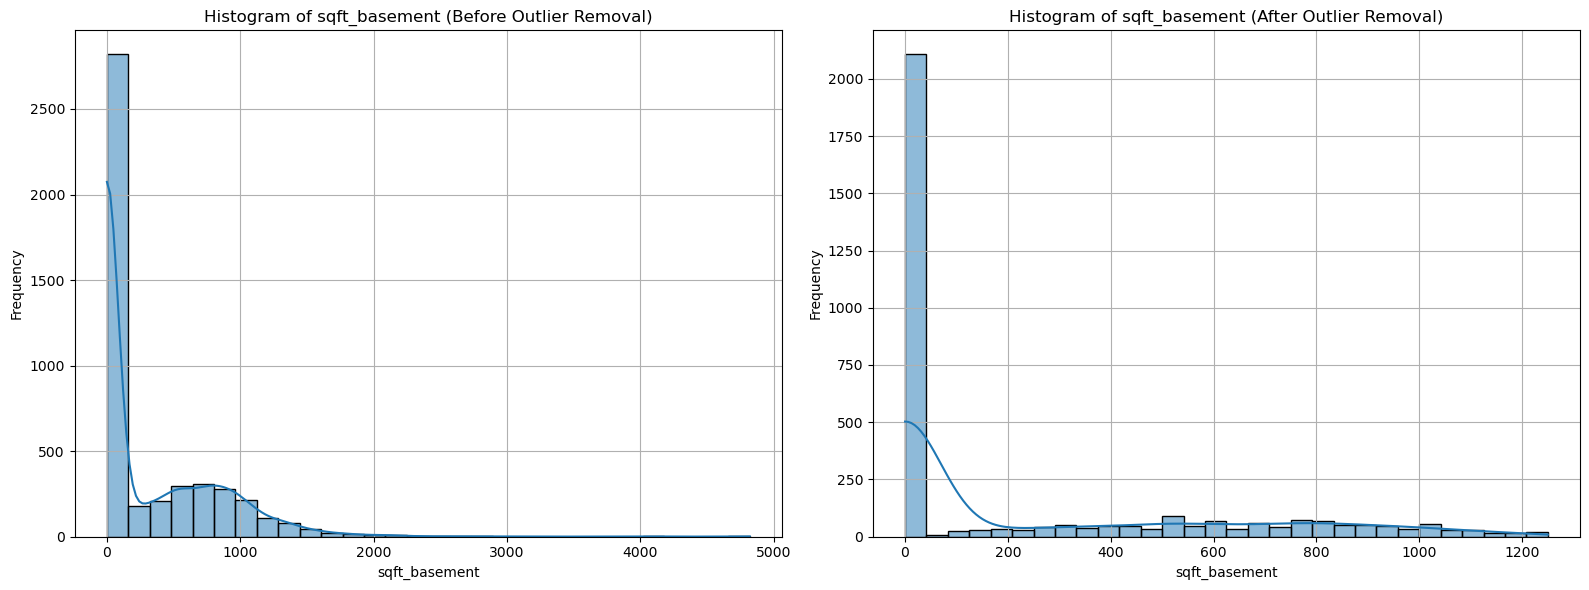

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


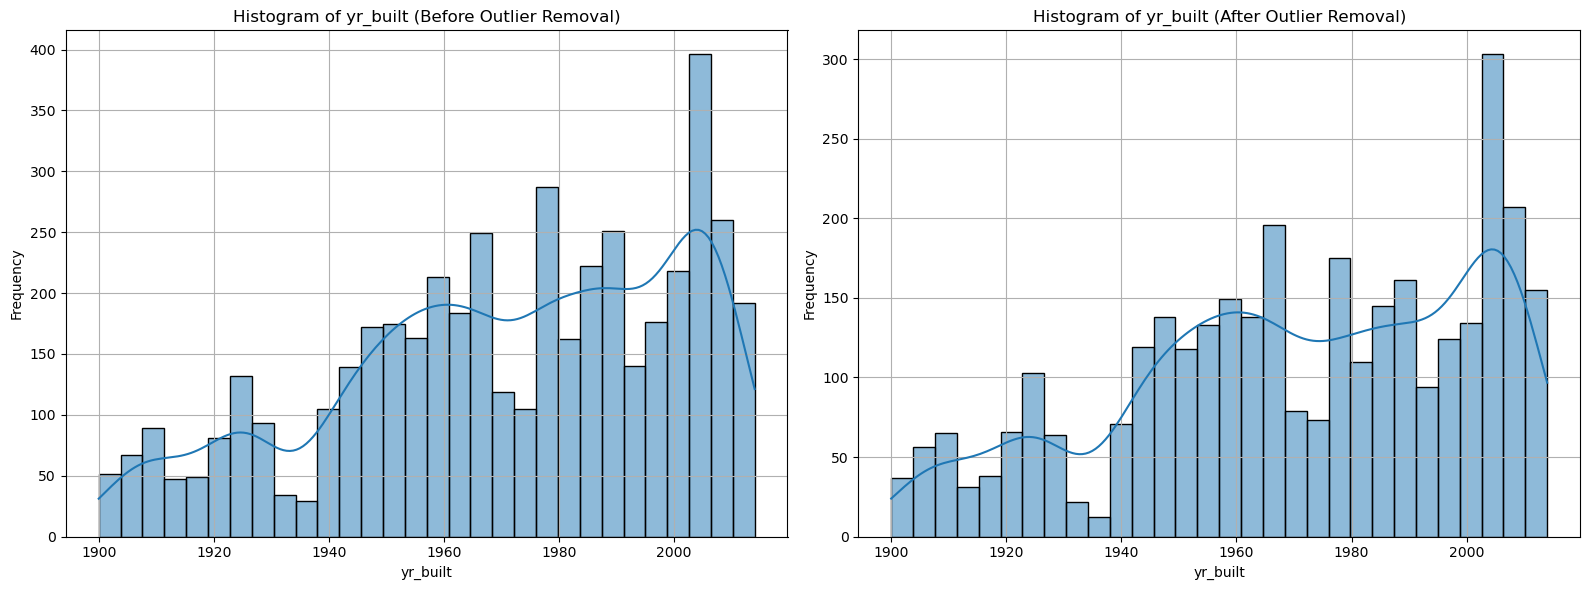

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


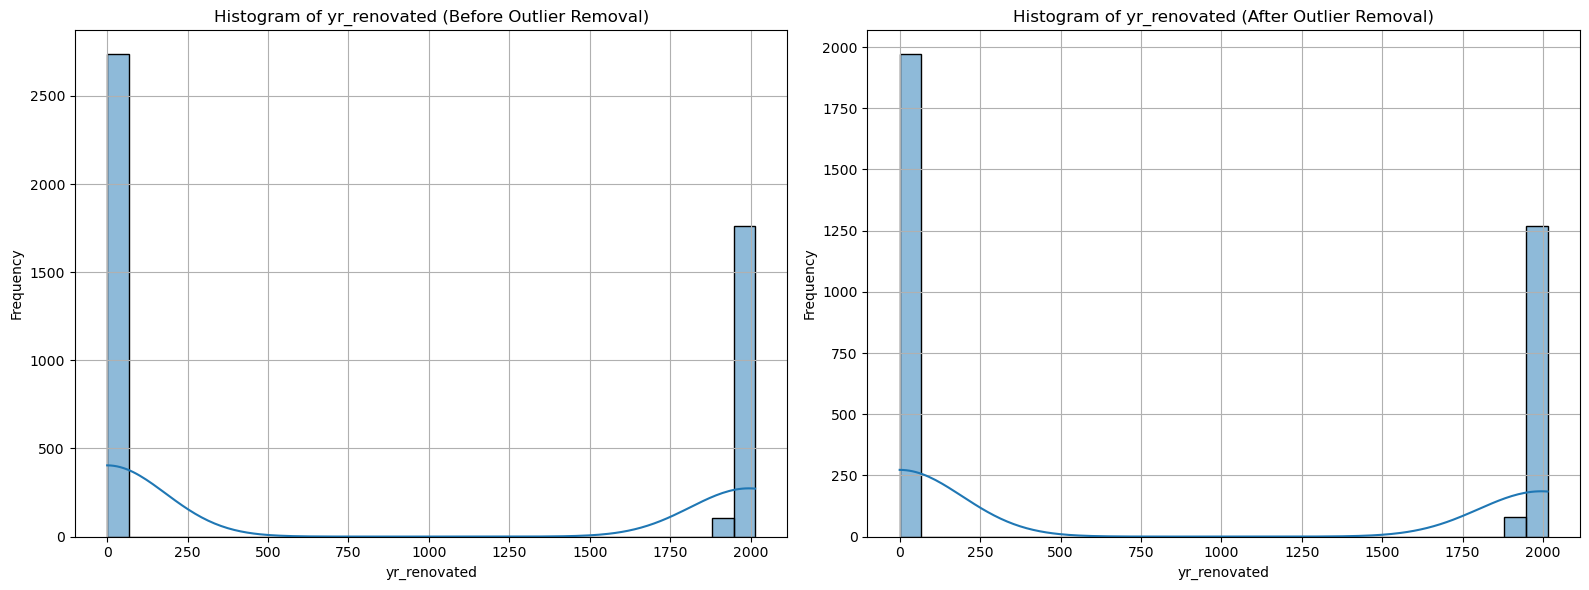

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

for variable in numerical_variables:
    plt.figure(figsize=(16, 6))

    # Plot histogram before removing outliers
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {variable} (Before Outlier Removal)')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)

    # Plot histogram after removing outliers
    plt.subplot(1, 2, 2)
    sns.histplot(df1[variable].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {variable} (After Outlier Removal)')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.tight_layout()
    plt.show()



In [51]:
# Frequency distribution for categorical variables
categorical_columns = ['date', 'street', 'city', 'statezip', 'country']

for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts().head(10))  # Display top 10 categories
    print()

Value counts for date:
date
2014-06-23 0:00    142
2014-06-25 0:00    131
2014-06-26 0:00    131
2014-07-08 0:00    127
2014-07-09 0:00    121
2014-06-24 0:00    120
2014-07-01 0:00    116
2014-05-20 0:00    116
2014-06-17 0:00    113
2014-05-28 0:00    111
Name: count, dtype: int64

Value counts for street:
street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
9413 34th Ave SW         2
6008 8th Ave NE          2
11034 NE 26th Pl         2
14583 NE 58th St         2
8430 8th Ave SW          2
5010 Greenwood Ave N     2
22840 SE 269th St        2
3510 S Holly St          2
Name: count, dtype: int64

Value counts for city:
city
Seattle        1573
Renton          293
Bellevue        286
Redmond         235
Issaquah        187
Kirkland        187
Kent            185
Auburn          176
Sammamish       175
Federal Way     148
Name: count, dtype: int64

Value counts for statezip:
statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
WA 98059    106

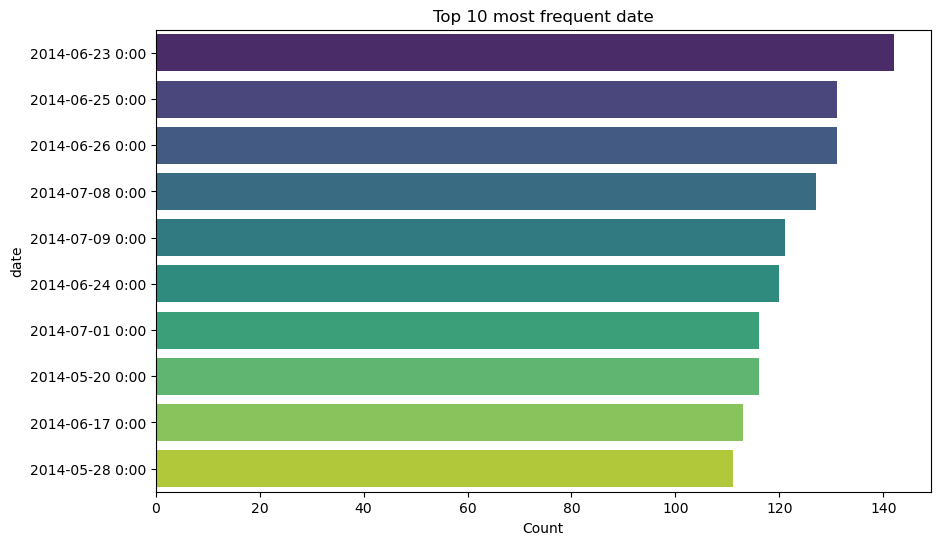

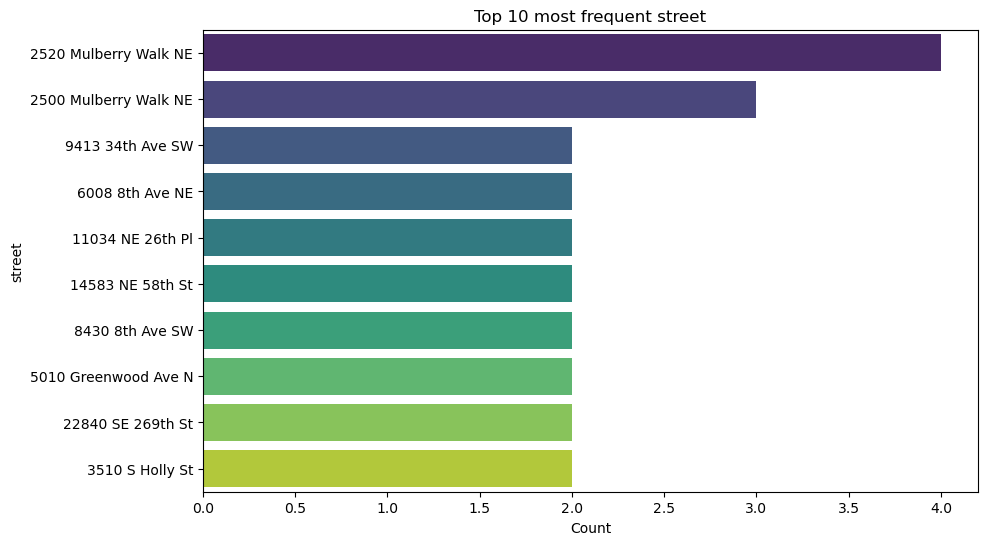

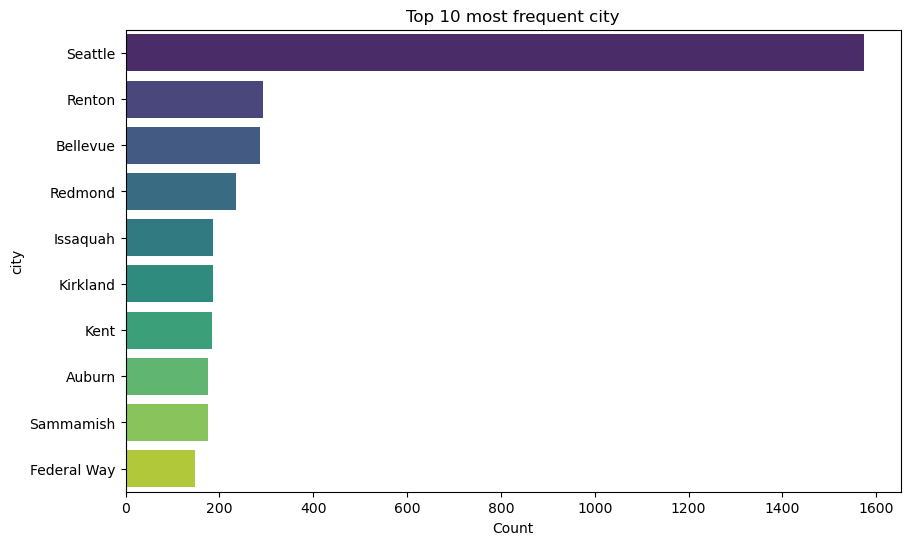

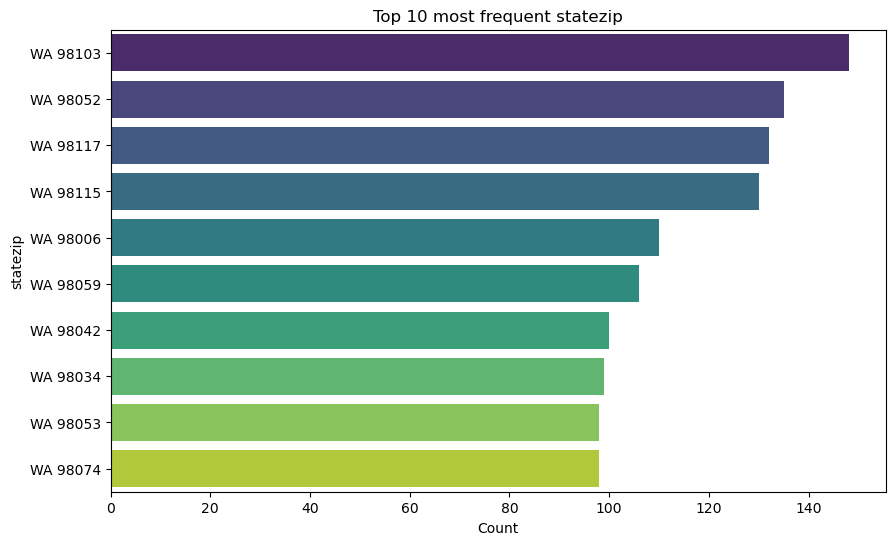

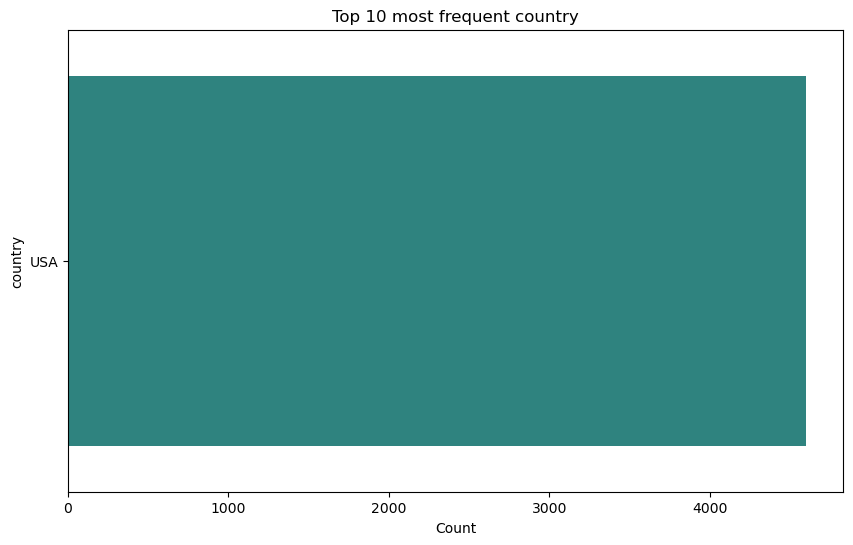

In [14]:
# Visualization for top N categories
def plot_top_categories(column, top_n=10):
    plt.figure(figsize=(10, 6))
    top_categories = df[column].value_counts().head(top_n)
    sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
    plt.title(f'Top {top_n} most frequent {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

for col in categorical_columns:
    plot_top_categories(col, top_n=10)


# -	Chi-square test to assess independence between two categorical variables

In [52]:
import pandas as pd
import scipy.stats as stats

# Read the dataset
file_path = 'Washington_price_dataset.csv'
df = pd.read_csv(file_path)

# Create a contingency table
contingency_table = pd.crosstab(df1['city'], df1['statezip'])
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("\nThere is a significant association between 'city' and 'statezip' (reject null hypothesis).")
else:
    print("\nThere is no significant association between 'city' and 'statezip' (fail to reject null hypothesis).")


Contingency Table:
statezip             WA 98001  WA 98002  WA 98003  WA 98004  WA 98005  \
city                                                                    
Algona                      4         0         0         0         0   
Auburn                     44        34         0         0         0   
Beaux Arts Village          0         0         0         1         0   
Bellevue                    0         0         0        24        20   
Black Diamond               0         0         0         0         0   
Bothell                     0         0         0         0         0   
Burien                      0         0         0         0         0   
Carnation                   0         0         0         0         0   
Clyde Hill                  0         0         0         2         0   
Covington                   0         0         0         0         0   
Des Moines                  0         0         0         0         0   
Duvall                      0   

Hypotheses--
Null Hypothesis: There is no association between 'city' and 'statezip'. This means that the distribution of properties across different statezip codes is independent of the city.

Alternative Hypothesis: There is an association between 'city' and 'statezip'. This means that the distribution of properties across different statezip codes depends on the city.

FINDINGS---------------------------------------

Chi-square statistic: 151086.49263395462
P-value: 0.0
Degrees of freedom: 3268


There is a significant association between 'city' and 'statezip' (reject null hypothesis).

# 8.2 Correlation between Prices and year built 

Pearson correlation coefficient between price and yr_built: -0.007864621691851256
P-value: 0.6507516060472477


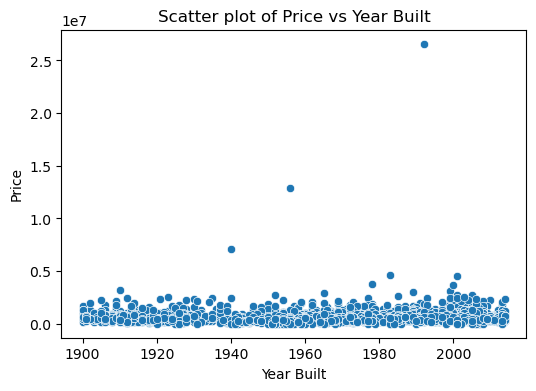

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


file_path = 'Washington_price_dataset.csv'
df = pd.read_csv(file_path)

# Calculate the Pearson correlation coefficient between price and yr_built
correlation_coefficient, p_value = pearsonr(df1['price'], df1['yr_built'])
print(f"Pearson correlation coefficient between price and yr_built: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Visualize the relationship with a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='yr_built', y='price', data=df)
plt.title('Scatter plot of Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()

 Pearson correlation coefficient between price and yr_built: -0.007864621691851256
P-value: 0.6507516060472477
    
Here the coefficient is -0.0079 (approximately). This value is very close to 0, indicating almost no linear relationship between price and yr_built.

A high P-value (> 0.05) indicates weak evidence against the null hypothesis, so we have failed to reject the null hypothesis.

Assumptions: In the context of correlation, the null hypothesis  typically states that there is no linear relationship between the two variables in the population.

'''Interpretation---

In this case, the P-value is 0.65075, which is much higher than 0.05. This indicates that the observed correlation is not statistically significant and could very likely be due to random chance.

In summary, the data does not support the idea that the year a house was built has any linear relationship with its price, and this conclusion is statistically robust given the high P-value.


# 8.3 Mann-Whitney U test to compare means between two groups.

Let's assume we want to compare the prices of houses
built before the year 2000 and those built in or after the year 2000.

U statistic: 790353.5
P-value: 6.124053161832603e-16
There is a statistically significant difference in prices between houses built before 2000 and those built in or after 2000.


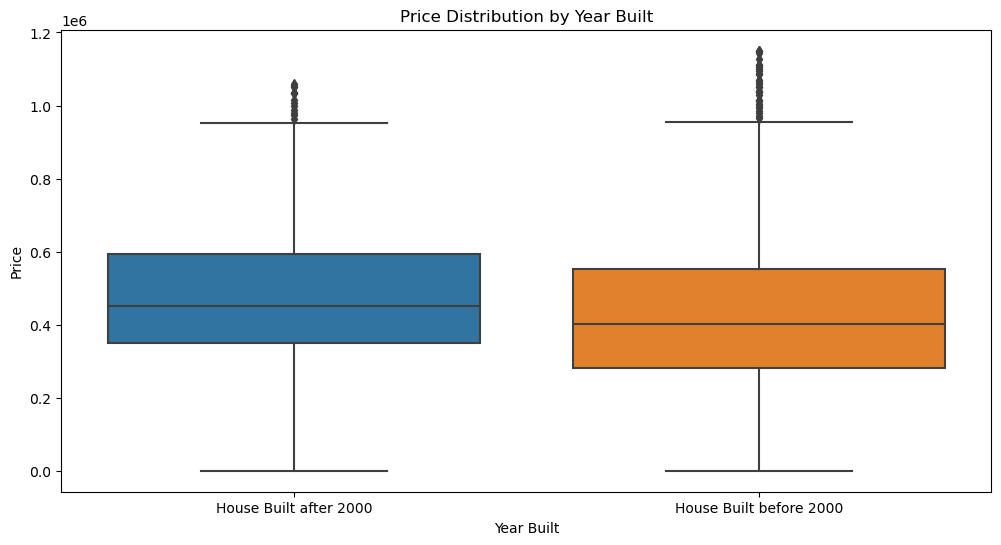

In [54]:
import pandas as pd
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
file_path = 'Washington_price_dataset.csv'
df = pd.read_csv(file_path)

# Split the data into two groups based on yr_built
group1 = df1[df1['yr_built'] < 2000]['price']
group2 = df1[df1['yr_built'] >= 2000]['price']

# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(group1, group2)
print(f"U statistic: {stat}")
print(f"P-value: {p}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("There is a statistically significant difference in prices between houses built before 2000 and those built in or after 2000.")
else:
    print("There is no statistically significant difference in prices between houses built before 2000 and those built in or after 2000.")

# Visualize the price distribution for the two groups
plt.figure(figsize=(12, 6))
sns.boxplot(x=df1['yr_built'] < 2000, y=df1['price'])
plt.xticks([0, 1], ['House Built after 2000', 'House Built before 2000'])
plt.title('Price Distribution by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()




Given the p-value is much smaller than the common significance threshold of 0.05, we can confidently reject the null hypothesis that there is no difference in house prices based on whether they were built before or after 2000.

This implies that the year a house was built has a significant impact on its price in your dataset.

Summary

Statistical Analysis: The Mann-Whitney U test shows a significant difference in house prices between the two groups.
Visualization: The box plot visually reinforces the difference in price distributions between houses built before and after 2000.

# 8.4 Analysis of Variance (ANOVA) to compare means across multiple groups

F-statistic: 49.33688122132812
P-value: 1.3435891597793e-311
There is a statistically significant difference in house prices between the cities.


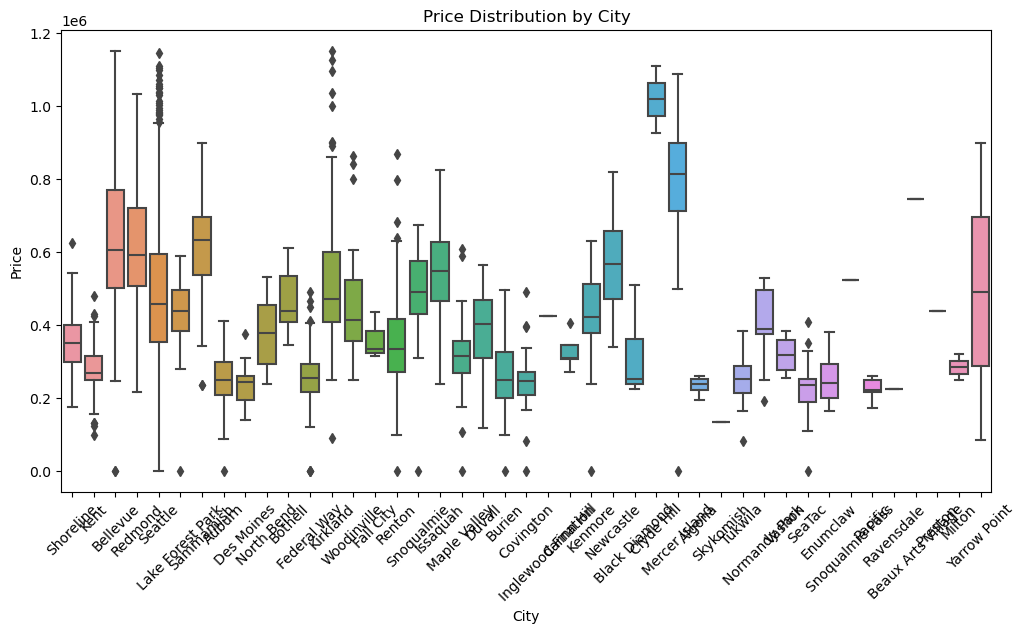

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Read the dataset
file_path = 'Washington_price_dataset.csv'
df = pd.read_csv(file_path)

# Prepare the data by grouping prices by city
grouped_data = df1.groupby('city')['price'].apply(list)

# Perform ANOVA
anova_result = f_oneway(*grouped_data)
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

# Interpretation
alpha = 0.05
if anova_result.pvalue < alpha:
    print("There is a statistically significant difference in house prices between the cities.")
else:
    print("There is no statistically significant difference in house prices between the cities.")

# Visualize the price distribution for each city
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='price', data=df1)
plt.xticks(rotation=45)
plt.title('Price Distribution by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()


# The output of your ANOVA test and the corresponding box plot show the following:

the null hypothesis assume that the mean house prices across all cities are equal but results reject the null hypothesis. Therefore, 

"There is a statistically significant difference in house prices between the cities."
 
Interpretation of Results
ANOVA Results: The very small p-value indicates that there is a statistically significant difference in house prices between the different cities.
Box Plot: The box plot visually represents the distribution of house prices for each city. Some cities have higher median prices and wider interquartile ranges, indicating greater price variability.
Detailed Insights
Significant Difference:

The ANOVA test confirms that not all city means are equal.
Some cities have significantly higher or lower house prices compared to others.
Visualization:

The box plot helps identify specific cities with higher price ranges.
Outliers are visible, indicating houses with prices significantly different from the rest of the dataset.

# 9 .Check for presence of collinearity and multi-collinearity 

Out of all numerical variable,Here price will be the dependet variable and rest will be independent variables

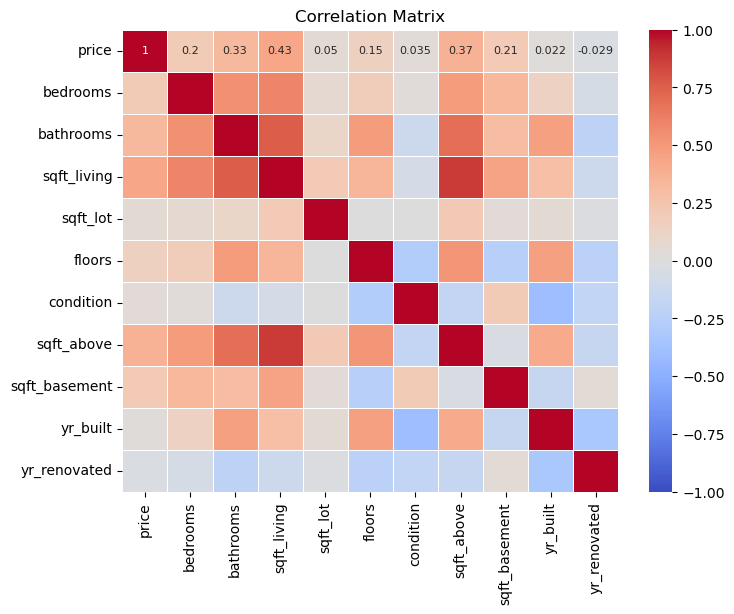

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
file_path = 'Washington_price_dataset.csv'
df = pd.read_csv(file_path)

# Convert infinite values to NaN
df1.replace([np.inf, -np.inf], np.nan, inplace=True)

# List of independent variables (including the dependent variable 'price')
ivar = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
         'condition', 'sqft_above', 'sqft_basement', 
        'yr_built', 'yr_renovated']

# Drop rows with missing values to calculate VIF
df1 = df[ivar].dropna()


# Correlation Matrix
plt.figure(figsize=(8, 6))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()



# Correlation Matrix Heatmap:
The value in each cell represents the correlation coefficient between the two variables at the head of the row and column.
A correlation coefficient can range from -1 to 1.
A positive correlation coefficient indicates a positive relationship between the two variables. For example, there is a positive correlation between the price of a house and its square footage (sqft_living).
A negative correlation coefficient indicates a negative relationship between the two variables. For example, there is a negative correlation between the price of a house and the year it was built (yr_built).
A correlation coefficient of 0 indicates no linear relationship between the two variables.
The closer the correlation coefficient is to 1 or -1, the stronger the relationship between the two variables.
Here are some specific examples from the correlation matrix:

There is a moderately strong positive correlation between price and the number of bedrooms (bedrooms) and bathrooms (bathrooms) in a house.
There is a strong positive correlation between price and the square footage of the living area (sqft_living) and lot size (sqft_lot) of a house.
There is a weak positive correlation between price and the number of floors (floors) in a house.
There is a weak negative correlation between price and the condition of the house (condition).
There is a strong negative correlation between price and the year a house was built (yr_built). This means that newer houses tend to be more expensive than older houses.

In [57]:
# Calculate VIF
def calculate_vif(data, variables):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = variables
    vif_data["VIF"] = [variance_inflation_factor(data[variables].values, i) for i in range(len(variables))]
    vif_data = vif_data.sort_values(by='VIF', ascending=False)  # Sort by VIF values in descending order
    return vif_data

# Calculate VIF for the independent variables
vif_data = calculate_vif(df1, ivar)
print("Variance Inflation Factor (VIF) in descending order:")
print(vif_data)

Variance Inflation Factor (VIF) in descending order:
         Variable           VIF
3     sqft_living  12058.576431
7      sqft_above   8964.319868
8   sqft_basement    684.042374
9        yr_built     64.354823
6       condition     30.821372
2       bathrooms     25.909952
1        bedrooms     24.772225
5          floors     16.571762
0           price      2.449859
10   yr_renovated      1.927476
4        sqft_lot      1.260633


Variance Inflation Factor (VIF) is a measure of multicollinearity in a regression analysis. It assesses how much the variance of an estimated regression coefficient is inflated by collinearity among the independent variables. A VIF value of 1 indicates no multicollinearity, and values greater than 5 indicate that multicollinearity may be a problem.

the VIFs for sqft_living, sqft_above, and sqft_basement are very high, indicating that there is severe multicollinearity among these variables. This means that these variables are highly correlated with each other, and it may be difficult to determine the independent effect of each variable on the dependent variable in a regression analysis.

In [61]:
# Drop ''sqft_living'' from the list of independent variables
ivar.remove('sqft_living')

# Calculate VIF for the modified independent variables
vif_data = calculate_vif(df1, ivar)
print("Variance Inflation Factor (VIF) after dropping ''sqft_living'':")
print(vif_data)


Variance Inflation Factor (VIF) after dropping ''sqft_living'':
        Variable        VIF
1       bedrooms  20.439901
3      condition  10.359997
4     sqft_above   9.526798
0          price   2.441393
5  sqft_basement   1.826959
6   yr_renovated   1.610374
2       sqft_lot   1.241936


In [62]:
# Drop 'bedrooms' from the list of independent variables
ivar.remove('bedrooms')

# Calculate VIF for the modified independent variables
vif_data = calculate_vif(df1, ivar)
print("Variance Inflation Factor (VIF) after dropping 'bedrooms':")
print(vif_data)


Variance Inflation Factor (VIF) after dropping 'bedrooms':
        Variable       VIF
3     sqft_above  5.365699
2      condition  5.292666
0          price  2.413637
4  sqft_basement  1.599368
5   yr_renovated  1.559434
1       sqft_lot  1.232770


# 11.	Split the dataset into training and testing subsets.

In [25]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the original dataset
file_path = 'Washington_price_dataset.csv'
df = pd.read_csv(file_path)

# Define columns to use
desired_columns = ['sqft_above', 'condition', 'price', 'sqft_basement', 'yr_renovated', 'sqft_lot']

# Create a new DataFrame with the selected columns and drop rows with missing values
df1 = df1[desired_columns].dropna()

# Display the first few rows of the new DataFrame
print(df1.head())

# Define the independent variables (X) and the dependent variable (y)
X = df1[['sqft_above', 'condition', 'sqft_basement', 'yr_renovated', 'sqft_lot']]
y = df1['price']

# Create the linear regression model
model = LinearRegression()

# Define the k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store actual and predicted values
actual_values = []
predicted_values = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Store the actual and predicted values
    actual_values.extend(y_test)
    predicted_values.extend(y_pred)

# Calculate overall evaluation metrics
mse = mean_squared_error(actual_values, predicted_values)
r2 = r2_score(actual_values, predicted_values)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the coefficients
model.fit(X, y)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Create a DataFrame to compare actual vs predicted prices
comparison_df = pd.DataFrame({'Actual Price': actual_values, 'Predicted Price': predicted_values})
print(comparison_df.head())

# Optionally, save the comparison DataFrame to a CSV file
comparison_file_path = 'actual_vs_predicted_prices.csv'
comparison_df.to_csv(comparison_file_path, index=False)


   sqft_above  condition      price  sqft_basement  yr_renovated  sqft_lot
0        1340          3   313000.0              0          2005      7912
1        3370          5  2384000.0            280             0      9050
2        1930          4   342000.0              0             0     11947
3        1000          4   420000.0           1000             0      8030
4        1140          4   550000.0            800          1992     10500
Mean Squared Error: 257932815124.77722
R-squared: 0.1884833847227143
                Coefficient
sqft_above       264.422078
condition      59882.251298
sqft_basement    256.895938
yr_renovated      22.692526
sqft_lot          -0.684761
   Actual Price  Predicted Price
0      452500.0    595074.864064
1      588500.0    551184.158974
2     1200000.0    766833.267530
3      367500.0    771261.548610
4      275000.0    288566.858974


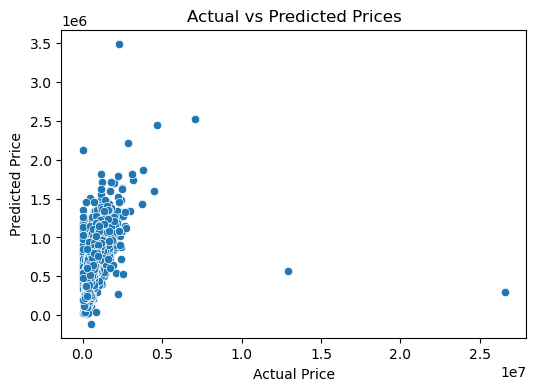

C:\Users\Nares\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


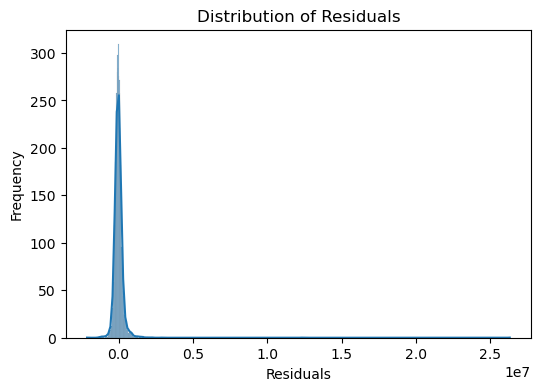

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(6, 4))
sns.scatterplot(x=actual_values, y=predicted_values)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

# Distribution plot of residuals
residuals = np.array(actual_values) - np.array(predicted_values)
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# Here are some observations from the scatter plot:

The data points are generally clustered around the diagonal line, which indicates that there is a positive correlation between predicted price and actual price. This means that the model is generally predicting higher prices for higher actual prices, and lower prices for lower actual prices.
There is some scatter around the diagonal line, which indicates that the model is not perfectly accurate in predicting prices. Some of the actual prices are higher than the predicted prices, and some are lower.
Overall, the scatter plot suggests that the model is somewhat successful at predicting prices, but there is room for improvement.





# Here are some observations from the histogram:

The x-axis shows the value of the residual and the y-axis shows the frequency. In this case, the residual is the difference between the actual price of a house and the price predicted by a model.

The histogram is centered close to zero, which indicates that the model is not systematically over-predicting or under-predicting prices.
The distribution of residuals appears to be slightly skewed to the right. This means that there are more residuals that are positive (actual price greater than predicted price) than residuals that are negative (actual price less than predicted price).
The shape of the distribution is not perfectly symmetrical, but it is closer to a normal distribution than some other possible shapes, such as a U-shaped distribution. This suggests that the errors in the model are random and not clustered at any particular value.
Overall, the histogram of residuals suggests that the model is performing reasonably well. The fact that the residuals are centered at zero means that there is no systematic bias in the model's predictions. The slight skew to the right suggests that there may be a tendency for the model to under-predict the price of some houses, but this is not a major issue.

In [26]:
#14
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Washington_price_dataset.csv'
df = pd.read_csv(file_path)


In [27]:
# Select the target variable
target_variable = 'price'

# Prepare the data
X = df1.drop(columns=[target_variable])  # Features
y = df1[target_variable]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the linear regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error: {mse_linear}")
print(f"Root Mean Squared Error: {rmse_linear}")
print(f"R-squared: {r2_linear}")

# Check assumptions (LINE)
# Here we can check Linearity, Independence, Normality, and Equal Variance assumptions
# We can use residual plots to check these assumptions


Linear Regression Model Evaluation:
Mean Squared Error: 987542191188.5793
Root Mean Squared Error: 993751.5741816862
R-squared: 0.031675506033140066


# Linear Regression Model Evaluation Report

The linear regression model for predicting property prices has been evaluated using three primary metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²). Below are the detailed results and interpretations of these metrics:

# Evaluation Metrics

1. Mean Squared Error (MSE): 987,542,191,188.5793
2. Root Mean Squared Error (RMSE): 993,751.5741816862
3. R-squared (R²): 0.031675506033140066

# Interpretation of Metrics

1. Mean Squared Error (MSE):
   Definition: MSE is the average of the squared differences between the actual and predicted values. It provides a measure of the quality of an estimator; the lower the MSE, the better the model.
   Result: 987,542,191,188.5793 is a very high value, indicating large errors in the model's predictions compared to the actual property prices.

2. Root Mean Squared Error (RMSE):
   Definition: RMSE is the square root of MSE and provides the error in the same units as the target variable, making it more interpretable.
   Result: 993,751.5741816862 suggests that on average, the model's predictions deviate from the actual values by approximately $993,751. This is a substantial error considering the range of property prices in the dataset.

3. R-squared (R²):
   Definition: R² is the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating better model performance.
   Result: 0.031675506033140066 means that only about 3.17% of the variance in property prices is explained by the model. This indicates a poor fit, suggesting that the model does not capture the underlying patterns in the data well.

# Analysis and Recommendations

Model Performance: The linear regression model shows poor performance, with a very high MSE and RMSE, and a low R² value. This indicates that the model's predictions are not accurate and that the model does not explain much of the variance in property prices.
  
-Possible Reasons for Poor Performance:
  Non-Linearity: Real estate prices may not have a linear relationship with the features used. More complex relationships might need to be captured.
  Feature Selection: Important features that significantly affect property prices might be missing or not properly engineered.
  Outliers and Noise: The presence of outliers and noise in the data can negatively impact model performance.



In [32]:
# Regression Tree Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate the regression tree model
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nRegression Tree Model Evaluation:")
print(f"Mean Squared Error: {mse_tree}")
print(f"Root Mean Squared Error: {rmse_tree}")
print(f"R-squared: {r2_tree}")

# Check for overfitting by comparing training and testing performance
train_score_tree = tree_model.score(X_train, y_train)
test_score_tree = tree_model.score(X_test, y_test)

print(f"Training R-squared: {train_score_tree}")
print(f"Testing R-squared: {test_score_tree}")




Regression Tree Model Evaluation:
Mean Squared Error: 1065314139407.9962
Root Mean Squared Error: 1032140.5618461064
R-squared: -0.044582990136774914
Training R-squared: 0.9999963547769303
Testing R-squared: -0.044582990136774914


### Regression Tree Model Evaluation Report

The regression tree model for predicting property prices has been evaluated using several metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R²), and separate R-squared values for the training and testing datasets. Below are the detailed results and interpretations of these metrics:

#### Evaluation Metrics

1. Mean Squared Error (MSE): 1,065,314,139,407.9962
2. Root Mean Squared Error (RMSE): 1,032,140.5618461064
3. R-squared (R²): -0.044582990136774914
4. Training R-square: 0.9999963547769303
5. Testing R-squar: -0.044582990136774914

#### Interpretation of Metrics

1. Mean Squared Error (MSE):
   Definition: MSE is the average of the squared differences between the actual and predicted values. It provides a measure of the quality of an estimator; the lower the MSE, the better the model.
    Result: 1,065,314,139,407.9962 is a very high value, indicating large errors in the model's predictions compared to the actual property prices.

2. Root Mean Squared Error (RMSE):
    Definition: RMSE is the square root of MSE and provides the error in the same units as the target variable, making it more interpretable.
    Result: 1,032,140.5618461064 suggests that on average, the model's predictions deviate from the actual values by approximately $1,032,140. This is a substantial error considering the range of property prices in the dataset.

3. R-squared (R²):
    Definition: R² is the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from -∞ to 1, with higher values indicating better model performance.
    Result: -0.044582990136774914 indicates that the model performs worse than a simple mean-based model. This suggests that the regression tree model is not capturing the underlying patterns in the data well.

4. Training R-squared:
    Definition: This metric indicates how well the model fits the training data.
    Result: 0.9999963547769303 is extremely high, indicating that the model fits the training data almost perfectly. This is a strong indicator of overfitting.

5. Testing R-squared:
    Definition: This metric indicates how well the model generalizes to unseen data (testing set).
    Result: -0.044582990136774914 indicates poor generalization, meaning the model does not perform well on the testing data.

#### Analysis and Recommendations

 Model Performance: The regression tree model shows poor performance on the testing data, with very high MSE and RMSE, and a negative R² value. The stark contrast between the training R² and testing R² values indicates severe overfitting.

Possible Reasons for Poor Performance:
  Overfitting: The model fits the training data too closely, capturing noise and outliers rather than the underlying pattern. This is evident from the almost perfect R² on the training set and the poor R² on the testing set.
   Complexity of the Model: Regression trees can easily become too complex, especially without constraints like pruning, leading to overfitting.





In [31]:
print("\nPerformance Comparison:")
print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Regression Tree RMSE: {rmse_tree}")



Performance Comparison:
Linear Regression RMSE: 993751.5741816862
Regression Tree RMSE: 1032140.5618461064


# Performance Comparison
Linear Regression RMSE: 993,751.57
Regression Tree RMSE: 1,032,140.56
The linear regression model performs slightly better than the regression tree model, with a lower RMSE indicating more accurate predictions. However, both models have high RMSE values, suggesting room for improvement.








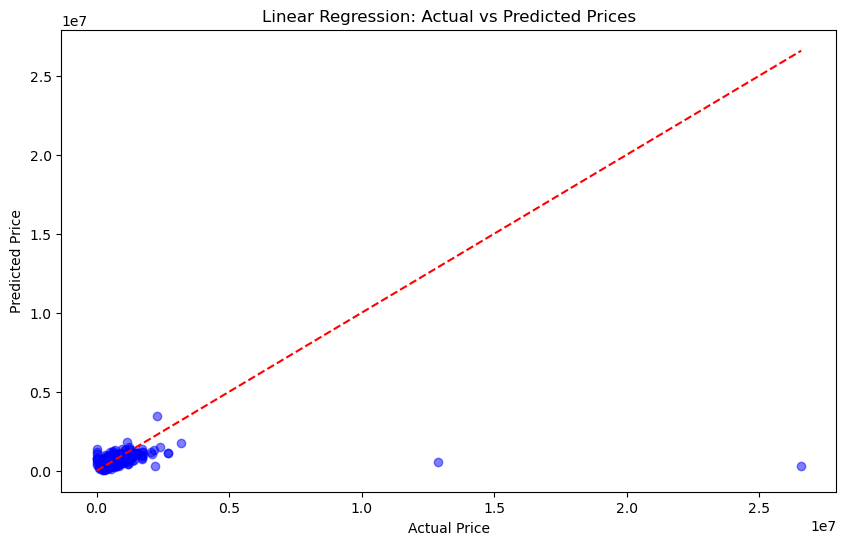

In [33]:
# Plotting the predicted vs. actual values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

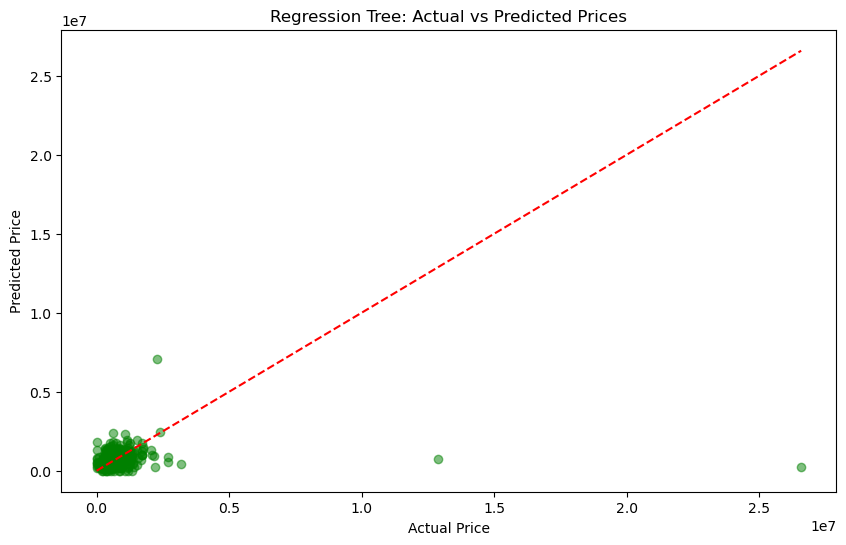

In [34]:
# Plotting the predicted vs. actual values for Regression Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Regression Tree: Actual vs Predicted Prices')
plt.show()


# Here are some observations from the scatter plot:

The x-axis shows the predicted price and the y-axis shows the actual price. The text labels on the axes are cut off a bit, but it appears to range from 0 to around 2.5 on the predicted price axis and 0 to around 3.5 on the actual price axis. There is a diagonal line plotted through the data points, which is likely the least squares regression line.

The data points are generally clustered around the diagonal line, which indicates that there is a positive correlation between predicted price and actual price. This means that the model is generally predicting higher prices for higher actual prices, and lower prices for lower actual prices.
There is some scatter around the diagonal line, which indicates that the model is not perfectly accurate in predicting prices. Some of the actual prices are higher than the predicted prices, and some are lower.
Overall, the scatter plot suggests that the model is somewhat successful at predicting prices, but there is room for improvement.

# some obersvation from second graph 

the vertical lines show the times at which the tree was split. Each split corresponds to a decision rule that is based on the values of the predictor variables. For example, the first split might have been based on the value of the time variable. If the time was before a certain date, the data might have been partitioned into one branch, and if the time was after that date, the data might have been partitioned into another branch.

The time series plot can be used to visualize how the predicted price changes over time. The plot can also be used to identify patterns in the data that the model has learned. For example, the plot might show that the predicted price tends to increase over time, or that it tends to be higher during certain times of the year.